<a href="https://colab.research.google.com/github/nike-2001/AI-Hands-on/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd

# Data Collection

### Downloading MNIST Train and Test Datasets  

In [ ]:
# Downloading the datasets using wget
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv

--2021-04-10 10:03:17--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.64.11
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.64.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.22M  23.9MB/s    in 3.1s    

2021-04-10 10:03:20 (23.9 MB/s) - ‘train.csv’ saved [76775041/76775041]

--2021-04-10 10:03:20--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.21

CSV to Dataframes

In [ ]:
train_df = pd.read_csv('train.csv')
train_X_df = train_df.drop('label', axis=1)
train_Y_df = train_df['label']

test_X_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_Y_df.head(2)

0    1
1    0
Name: label, dtype: int64

# Splitting the Data

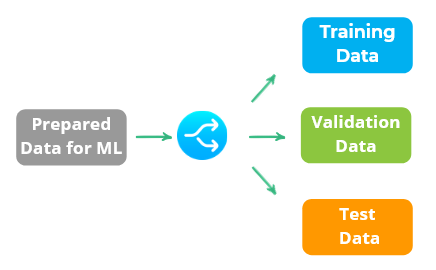

### sklearn.model_selection.train_test_split()

* `sklearn.model_selection.train_test_split(*arrays, test_size=None)`

    Splits arrays or dataframes into random train and test subsets
  * `*arrays` can be pandas dataframes
  * `test_size`: Represents the proportion of the dataset to include in the test split

Since Test Data is already provided separately, `train_X_df` is split into train(`train_X_split`) and validation(`validation_X_split`) sets.

In [ ]:
from sklearn.model_selection import train_test_split
train_X_split, validation_X_split, train_Y_split, validation_Y_split = train_test_split(train_X_df, train_Y_df, test_size=0.2)

print('Train X shape', train_X_split.shape)
print('Validation X shape', validation_X_split.shape)

Train X shape (33600, 784)
Validation X shape (8400, 784)


# Training

### sklearn.neighbors.KNeighborsClassifier()

* `sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)`

  Returns classifier `clf` implementing the k-nearest neighbors.
  
  * `n_neighbors` represents number of neighbors **(k)**
  * `p` repesents power parameter for Minkowski's distance.
* `clf.fit()` fits the k-nearest neighbors classifier on the given data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
num_neighbors = 1
distance_param = 2
clf = KNeighborsClassifier(n_neighbors=num_neighbors, p=distance_param)
clf.fit(train_X_split, train_Y_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Tuning Hyperparameters

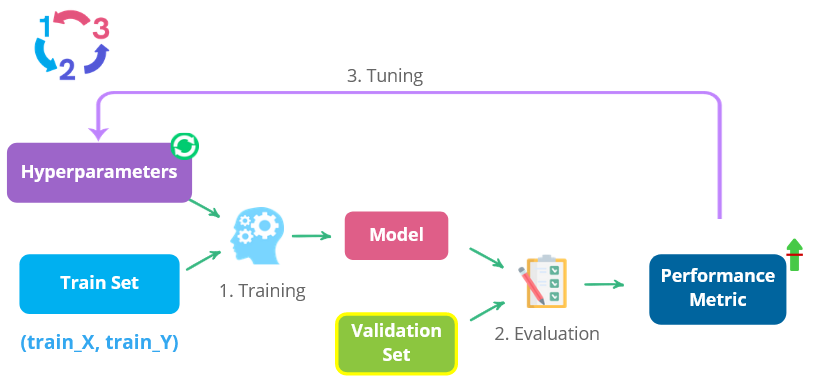

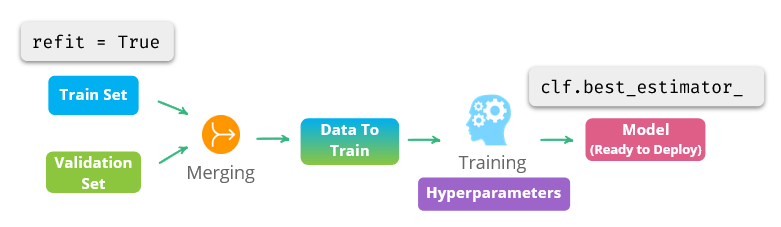

### sklearn.model_selection.GridSearchCV

* `sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0)`

  Exhaustive search over specified parameter values for an estimator
  * `estimator`: A object of given type is instantiated for each grid point
  * `param_grid` is a dictionary with parameters names (str) as keys and lists of parameters to try
  * `scoring` is the strategy to evaluate the performance of the model on the test set
  * `n_jobs` represents number of jobs to run in parallel
  * `refit`: If this is true, it refits an estimator using the best found parameters on the whole dataset
  * `cv` determines the cross-validation splitting strategy
  * `verbose` controls the verbosity.The higher, the more messages

* `clf.best_params_` returns a dictionary that represents Parameter setting that gave the best results on the hold out data.

(Takes ~1 hr to run)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    'n_neighbors': [10, 15],
    'p': [1,2]
}

clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring='accuracy', n_jobs=2, refit=True, cv=2, verbose=1) 
clf.fit(train_X_df, train_Y_df)
print(clf.best_params_)

# 'p': 2, 'n_neighbors': 10 returned as best

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed: 67.6min finished


{'n_neighbors': 10, 'p': 2}


# New Section

In [ ]:
clf.cv_results_

{'mean_fit_time': array([5.22289085, 4.77478421, 4.82710779, 4.83234096]),
 'mean_score_time': array([ 998.91225958, 1018.69335628, 1000.06227863, 1016.3567549 ]),
 'mean_test_score': array([0.94642857, 0.95533333, 0.9417381 , 0.95135714]),
 'param_n_neighbors': masked_array(data=[10, 10, 15, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10, 'p': 1},
  {'n_neighbors': 10, 'p': 2},
  {'n_neighbors': 15, 'p': 1},
  {'n_neighbors': 15, 'p': 2}],
 'rank_test_score': array([3, 1, 4, 2], dtype=int32),
 'split0_test_score': array([0.94695238, 0.95561905, 0.94209524, 0.95228571]),
 'split1_test_score': array([0.94590476, 0.95504762, 0.94138095, 0.95042857]),
 'std_fit_time': array([0.00639224, 0.00449574, 0.00896633, 0.02872777]),
 'std_score_time': array([1.074490

# Predicting for Test Data

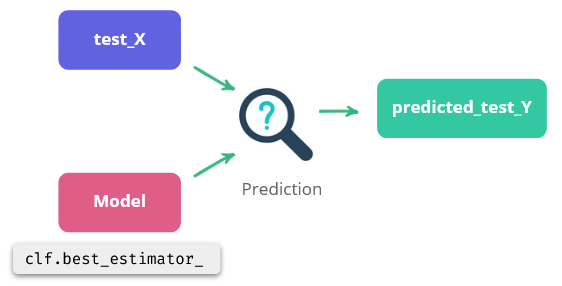

(Takes ~40 mins to run)

* `clf.best_estimator_` contains an estimator trained using the best found parameters on the whole dataset
* `model.predict(X)`: Returns an array of predicted class labels for `X` using the trained `model`

In [ ]:
best_model = clf.best_estimator_
predicted_test_Y = best_model.predict(test_X_df)
predicted_test_Y

array([2, 0, 9, ..., 3, 9, 2])

# Deployment
Submission to **Kaggle**: Create account in Kaggle and upload the `submission.csv` [here](https://www.kaggle.com/c/digit-recognizer/submit)


Kaggle does the evaluation on Test Data.

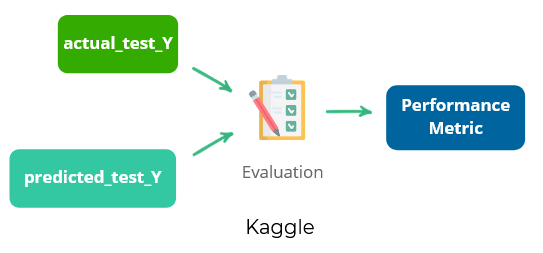

In [ ]:
predicted_test_Y_df = pd.DataFrame(predicted_test_Y)
predicted_test_Y_df.columns = ['Label']
predicted_test_Y_df.insert(loc=0, column='ImageId', value=predicted_test_Y_df.index + 1)
print(predicted_test_Y_df)

predicted_test_Y_df.to_csv('submission.csv', index=False)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      4
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


# Prediction for single Test instance

In [ ]:
# Training
from sklearn.neighbors import KNeighborsClassifier
num_neighbors = 10
distance_param = 2
clf = KNeighborsClassifier(n_neighbors=num_neighbors, p=distance_param)
clf.fit(train_X_df, train_Y_df)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# Function to visualize the pixels as gray-scale image
import numpy as np
import matplotlib.pyplot as plt

def visualise(image_df):
    image_1D = image_df.to_numpy()
    image_2D = image_1D.reshape((28,28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

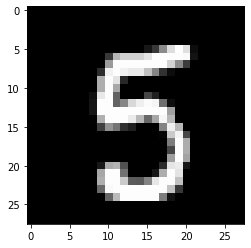

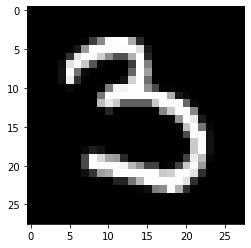

array([5, 3])

In [ ]:
#Prediction
visualise(test_X_df.loc[10])
visualise( test_X_df.loc[16])
clf.predict([test_X_df.loc[10], test_X_df.loc[16]])